In [268]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [269]:
# Download data from Yahoo Finance
# df = yf.download("^NSEI", start="2020-01-01", end="2024-01-09")
# df = yf.download("AAPL", start="2020-01-01", end="2024-01-09")
df = yf.download("BTC-USD", start="2020-01-01", end="2021-09-01")

# Change column names from upper to lower case
df. columns = df.columns.str.lower()

# Delete the adj close column
df = df.drop(columns=["adj close"])

# df.head(3)

[*********************100%%**********************]  1 of 1 completed


Moving Average Crossover:

Concept:
 
This strategy involves using two moving averages of different periods (e.g., 50-day and 200-day moving averages). When the shorter-term moving average crosses above the longer-term moving average, it generates a buy signal, indicating a potential uptrend. Conversely, when the shorter-term moving average crosses below the longer-term moving average, it generates a sell signal, indicating a potential downtrend.

Implementation: You can implement this strategy by calculating the moving averages and monitoring their crossovers. For example, if the 50-day moving average crosses above the 200-day moving average, generate a buy signal, and vice versa.

In [270]:
fast_ma = 8
slow_ma = 21

# Add column for fast moving average (ema_fast) and slow moving average (ema_21)
df["ema_8"] = ta.ema(df.close, length=fast_ma)
df["ema_21"] = ta.ema(df.close, length=slow_ma)

# Remove rows with missing values
df = df.dropna()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_13652\3665932549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["buy_signal"] = (df_x_ema["ema_8"] > df_x_ema["ema_21"]) & (df_x_ema["ema_8"].shift(1) <= df_x_ema["ema_21"].shift(1))
C:\Users\iamlo\AppData\Local\Temp\ipykernel_13652\3665932549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["sell_signal"] = (df_x_ema["ema_8"] < df_x_ema["ema_21"]) & (df_x_ema["ema_8"].shift(1) >= df_x_ema["ema_21"].shift(1))
C:\Users\iamlo\AppData\Local\

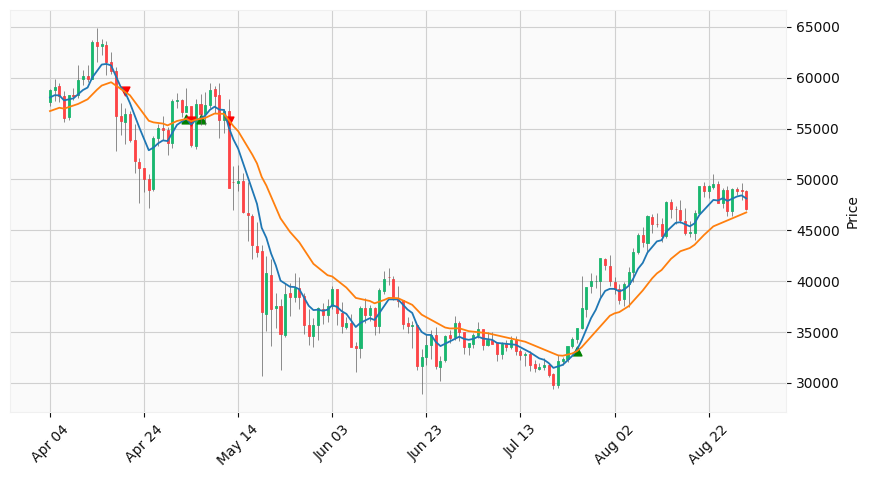

In [271]:
# create a df_x_rsi_rsi_rsi_rsi_rsi_rsi_rsi_rsi to contain a subset of df
df_x_ema = df[-150: -1]

# If fast moving average is crosses over the slow moving average the buy signal must be true
df_x_ema["buy_signal"] = (df_x_ema["ema_8"] > df_x_ema["ema_21"]) & (df_x_ema["ema_8"].shift(1) <= df_x_ema["ema_21"].shift(1))
# If fast moving average is crosses below the slow moving average the sell signal must be true
df_x_ema["sell_signal"] = (df_x_ema["ema_8"] < df_x_ema["ema_21"]) & (df_x_ema["ema_8"].shift(1) >= df_x_ema["ema_21"].shift(1))

# when the buy signal is true populate the price in buy_numeric column
df_x_ema["buy_numeric"] = np.where(df_x_ema["buy_signal"],df_x_ema["ema_21"], np.nan)
# when the sell signal is true populate the price in sell_numeric column
df_x_ema["sell_numeric"] = np.where(df_x_ema["sell_signal"],df_x_ema["ema_21"], np.nan)

adp = [
    # Plot the fast moving average
    mpf.make_addplot(df_x_ema["ema_8"], type="line"), 
    # Plot the slow moving average
    mpf.make_addplot(df_x_ema["ema_21"], type="line"),
    # Plot the buy signal 
    mpf.make_addplot(df_x_ema["buy_numeric"], type="scatter", marker="^", markersize=40, color="green"),
    # Plot the sell signal
    mpf.make_addplot(df_x_ema["sell_numeric"], type="scatter", marker="v", markersize=40, color="red")
    ]
# Plot the candle sticks, fast ma and slow ma, trading signal markers
mpf.plot(df_x_ema, type="candle", figratio=(15,8), addplot=adp, style="yahoo")

In [272]:
# These are the dates and prices on which to buy
df_x_ema.loc[df_x_ema["buy_signal"], "ema_21"]

Date
2021-05-03    55947.965768
2021-05-06    55914.304226
2021-07-25    33113.944708
Name: ema_21, dtype: float64

In [273]:
# These are the dates and prices on which to sell
df_x_ema.loc[df_x_ema["sell_signal"], "ema_21"]

Date
2021-04-20    58705.064425
2021-05-04    55710.290613
2021-05-12    55779.772058
Name: ema_21, dtype: float64

Relative Strength Index (RSI):

Concept: 
RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock. Traditionally, RSI values above 70 indicate overbought conditions, suggesting a potential reversal to the downside, while RSI values below 30 indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the RSI for a given period (typically 14 days) and use threshold values (e.g., 70 and 30) to generate buy or sell signals based on overbought or oversold conditions, respectively.

In [276]:
df = df.drop(columns=["ema_8", "ema_21"])

# create a df_x_rsi to contain a subset of df
df_x_rsi = df[-150: -1]

# Calculate Relative Strength Index and to new column
df_x_rsi["rsi"] = ta.rsi(df_x_rsi["close"], length=14)

# Drop rows with NaN values
df_x_rsi = df_x_rsi.dropna()

# Display the first few 
df_x_rsi.head()


C:\Users\iamlo\AppData\Local\Temp\ipykernel_13652\4177483005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_rsi["rsi"] = ta.rsi(df_x_rsi["close"], length=14)


,open,high,low,close,volume,rsi
Date,,,,,,
2021-04-18,60701.886719,61057.457031,52829.535156,56216.183594,97468872758,36.470166
2021-04-19,56191.585938,57520.054688,54368.593750,55724.265625,65344865159,35.101540
2021-04-20,55681.792969,57062.148438,53448.046875,56473.031250,67849323955,38.862451
2021-04-21,56471.128906,56757.972656,53695.468750,53906.089844,54926612466,32.013207
2021-04-22,53857.105469,55410.230469,50583.812500,51762.273438,74798630778,27.632980


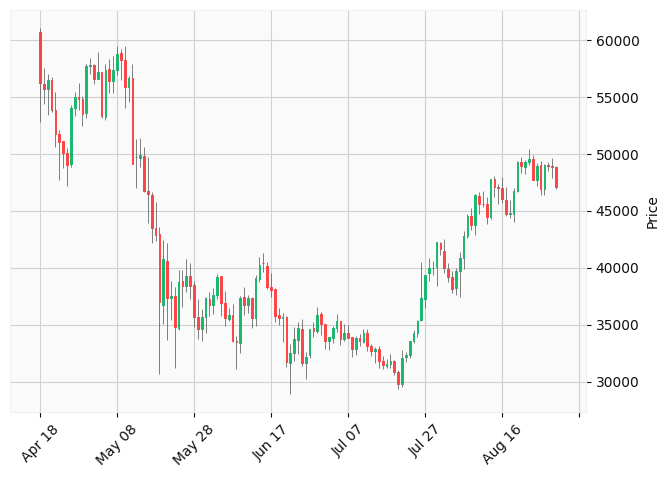

In [275]:
mpf.plot(df_x_rsi, type="candle", style="yahoo")